In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="Gb6Bdsa1RAucMq5EsDTY")
project = rf.workspace("iconsside2").project("modelchoose")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.73, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to modelChoose-1 in yolov8:: 100%|██████████| 2696/2696 [00:00<00:00, 7285.04it/s]


In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 344MB/s]


Transferred 355/355 items from pretrained weights


In [11]:
# Train the model
results = model.train(data=f"{dataset.location}/data.yaml", epochs=30, imgsz=640)

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/modelChoose-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 130MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/modelChoose-1/train/labels... 940 images, 0 backgrounds, 0 corrupt: 100%|██████████| 940/940 [00:00<00:00, 2019.74it/s]

train: New cache created: /content/modelChoose-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/modelChoose-1/valid/labels... 268 images, 0 backgrounds, 0 corrupt: 100%|██████████| 268/268 [00:00<00:00, 1066.63it/s]

val: New cache created: /content/modelChoose-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.49G      1.308      3.984      1.052         63        640: 100%|██████████| 59/59 [00:22<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        268        598    0.00516      0.619      0.171      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.28G      1.274      2.537      1.046         27        640: 100%|██████████| 59/59 [00:18<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]


                   all        268        598      0.726      0.488      0.722      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.31G      1.284      2.023       1.08         45        640: 100%|██████████| 59/59 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]


                   all        268        598      0.815      0.791      0.837      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.29G      1.193      1.703      1.038         33        640: 100%|██████████| 59/59 [00:18<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]

                   all        268        598      0.878      0.872      0.917      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.18G      1.181      1.551      1.044         46        640: 100%|██████████| 59/59 [00:18<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]

                   all        268        598      0.893      0.864      0.928      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.29G      1.197      1.415      1.036         49        640: 100%|██████████| 59/59 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all        268        598      0.924      0.901      0.946      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.29G      1.135      1.278      1.013         37        640: 100%|██████████| 59/59 [00:18<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]

                   all        268        598      0.907      0.916      0.938      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.28G      1.169      1.254      1.032         42        640: 100%|██████████| 59/59 [00:17<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        268        598      0.908      0.936      0.949      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.29G      1.133       1.16      1.023         44        640: 100%|██████████| 59/59 [00:17<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]

                   all        268        598      0.903       0.93      0.959      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.29G      1.104      1.088       1.01         37        640: 100%|██████████| 59/59 [00:18<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        268        598      0.922      0.951      0.965      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.29G      1.112      1.061      1.007         27        640: 100%|██████████| 59/59 [00:18<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        268        598      0.921       0.96       0.97      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.28G      1.119      1.042      1.022         52        640: 100%|██████████| 59/59 [00:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all        268        598      0.933      0.958      0.964      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.28G      1.106     0.9831      1.011         38        640: 100%|██████████| 59/59 [00:18<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.60it/s]

                   all        268        598      0.914      0.965      0.966      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.29G       1.13     0.9796     0.9975         30        640: 100%|██████████| 59/59 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]

                   all        268        598      0.933      0.953      0.966      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.28G       1.06     0.9002      0.994         42        640: 100%|██████████| 59/59 [00:17<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        268        598      0.936      0.966       0.97      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.31G      1.047     0.8854      0.996         56        640: 100%|██████████| 59/59 [00:18<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        268        598      0.951      0.961       0.97      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.29G       1.04     0.8348     0.9786         24        640: 100%|██████████| 59/59 [00:18<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        268        598      0.952      0.952      0.969      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.29G      1.036     0.8374     0.9927         29        640: 100%|██████████| 59/59 [00:18<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]


                   all        268        598      0.949      0.953      0.971      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.29G       1.03     0.8185     0.9804         25        640: 100%|██████████| 59/59 [00:18<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.26it/s]

                   all        268        598      0.948      0.963      0.973      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.29G      1.036     0.8118     0.9769         39        640: 100%|██████████| 59/59 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        268        598      0.932      0.949      0.958      0.699


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.41G      1.064     0.7897      1.006         28        640: 100%|██████████| 59/59 [00:19<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        268        598      0.955      0.946      0.962      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.29G      1.048     0.7429     0.9979         22        640: 100%|██████████| 59/59 [00:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        268        598      0.944      0.962      0.969      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.27G      1.041     0.7491      0.991         30        640: 100%|██████████| 59/59 [00:17<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        268        598      0.949      0.958      0.972      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.29G      1.018     0.7282     0.9902         20        640: 100%|██████████| 59/59 [00:18<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.35it/s]

                   all        268        598      0.948      0.949      0.967      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.29G     0.9908     0.6921     0.9839         26        640: 100%|██████████| 59/59 [00:17<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        268        598      0.953      0.954      0.974      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.29G      0.996     0.6854     0.9719         21        640: 100%|██████████| 59/59 [00:17<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]

                   all        268        598      0.964      0.952      0.974      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.29G     0.9796     0.6591     0.9647         36        640: 100%|██████████| 59/59 [00:18<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        268        598      0.966      0.958      0.975      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       2.3G     0.9686     0.6541     0.9694         22        640: 100%|██████████| 59/59 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]

                   all        268        598       0.96      0.953      0.969      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.29G     0.9644     0.6531     0.9666         20        640: 100%|██████████| 59/59 [00:17<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]

                   all        268        598      0.965      0.956      0.972       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.29G     0.9383     0.6291     0.9496         15        640: 100%|██████████| 59/59 [00:17<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]


                   all        268        598      0.969      0.956      0.973      0.712

30 epochs completed in 0.186 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


                   all        268        598      0.964      0.952      0.974      0.714
                     0         99         99          1      0.942      0.984      0.682
                     1         85         85       0.94      0.965      0.944       0.63
                     2         82         82      0.972      0.976      0.989      0.698
                     3         87         88      0.954      0.947       0.95      0.629
                     4         79         80      0.981      0.963      0.987      0.658
                     5         35         35      0.971          1      0.994      0.746
                     6         21         21          1      0.965      0.995      0.789
                     7         31         32      0.875      0.876      0.943      0.722
                     8         29         30      0.966      0.948      0.978      0.871
                     9         46         46       0.98      0.935      0.975      0.714
Speed: 0.3ms preproce

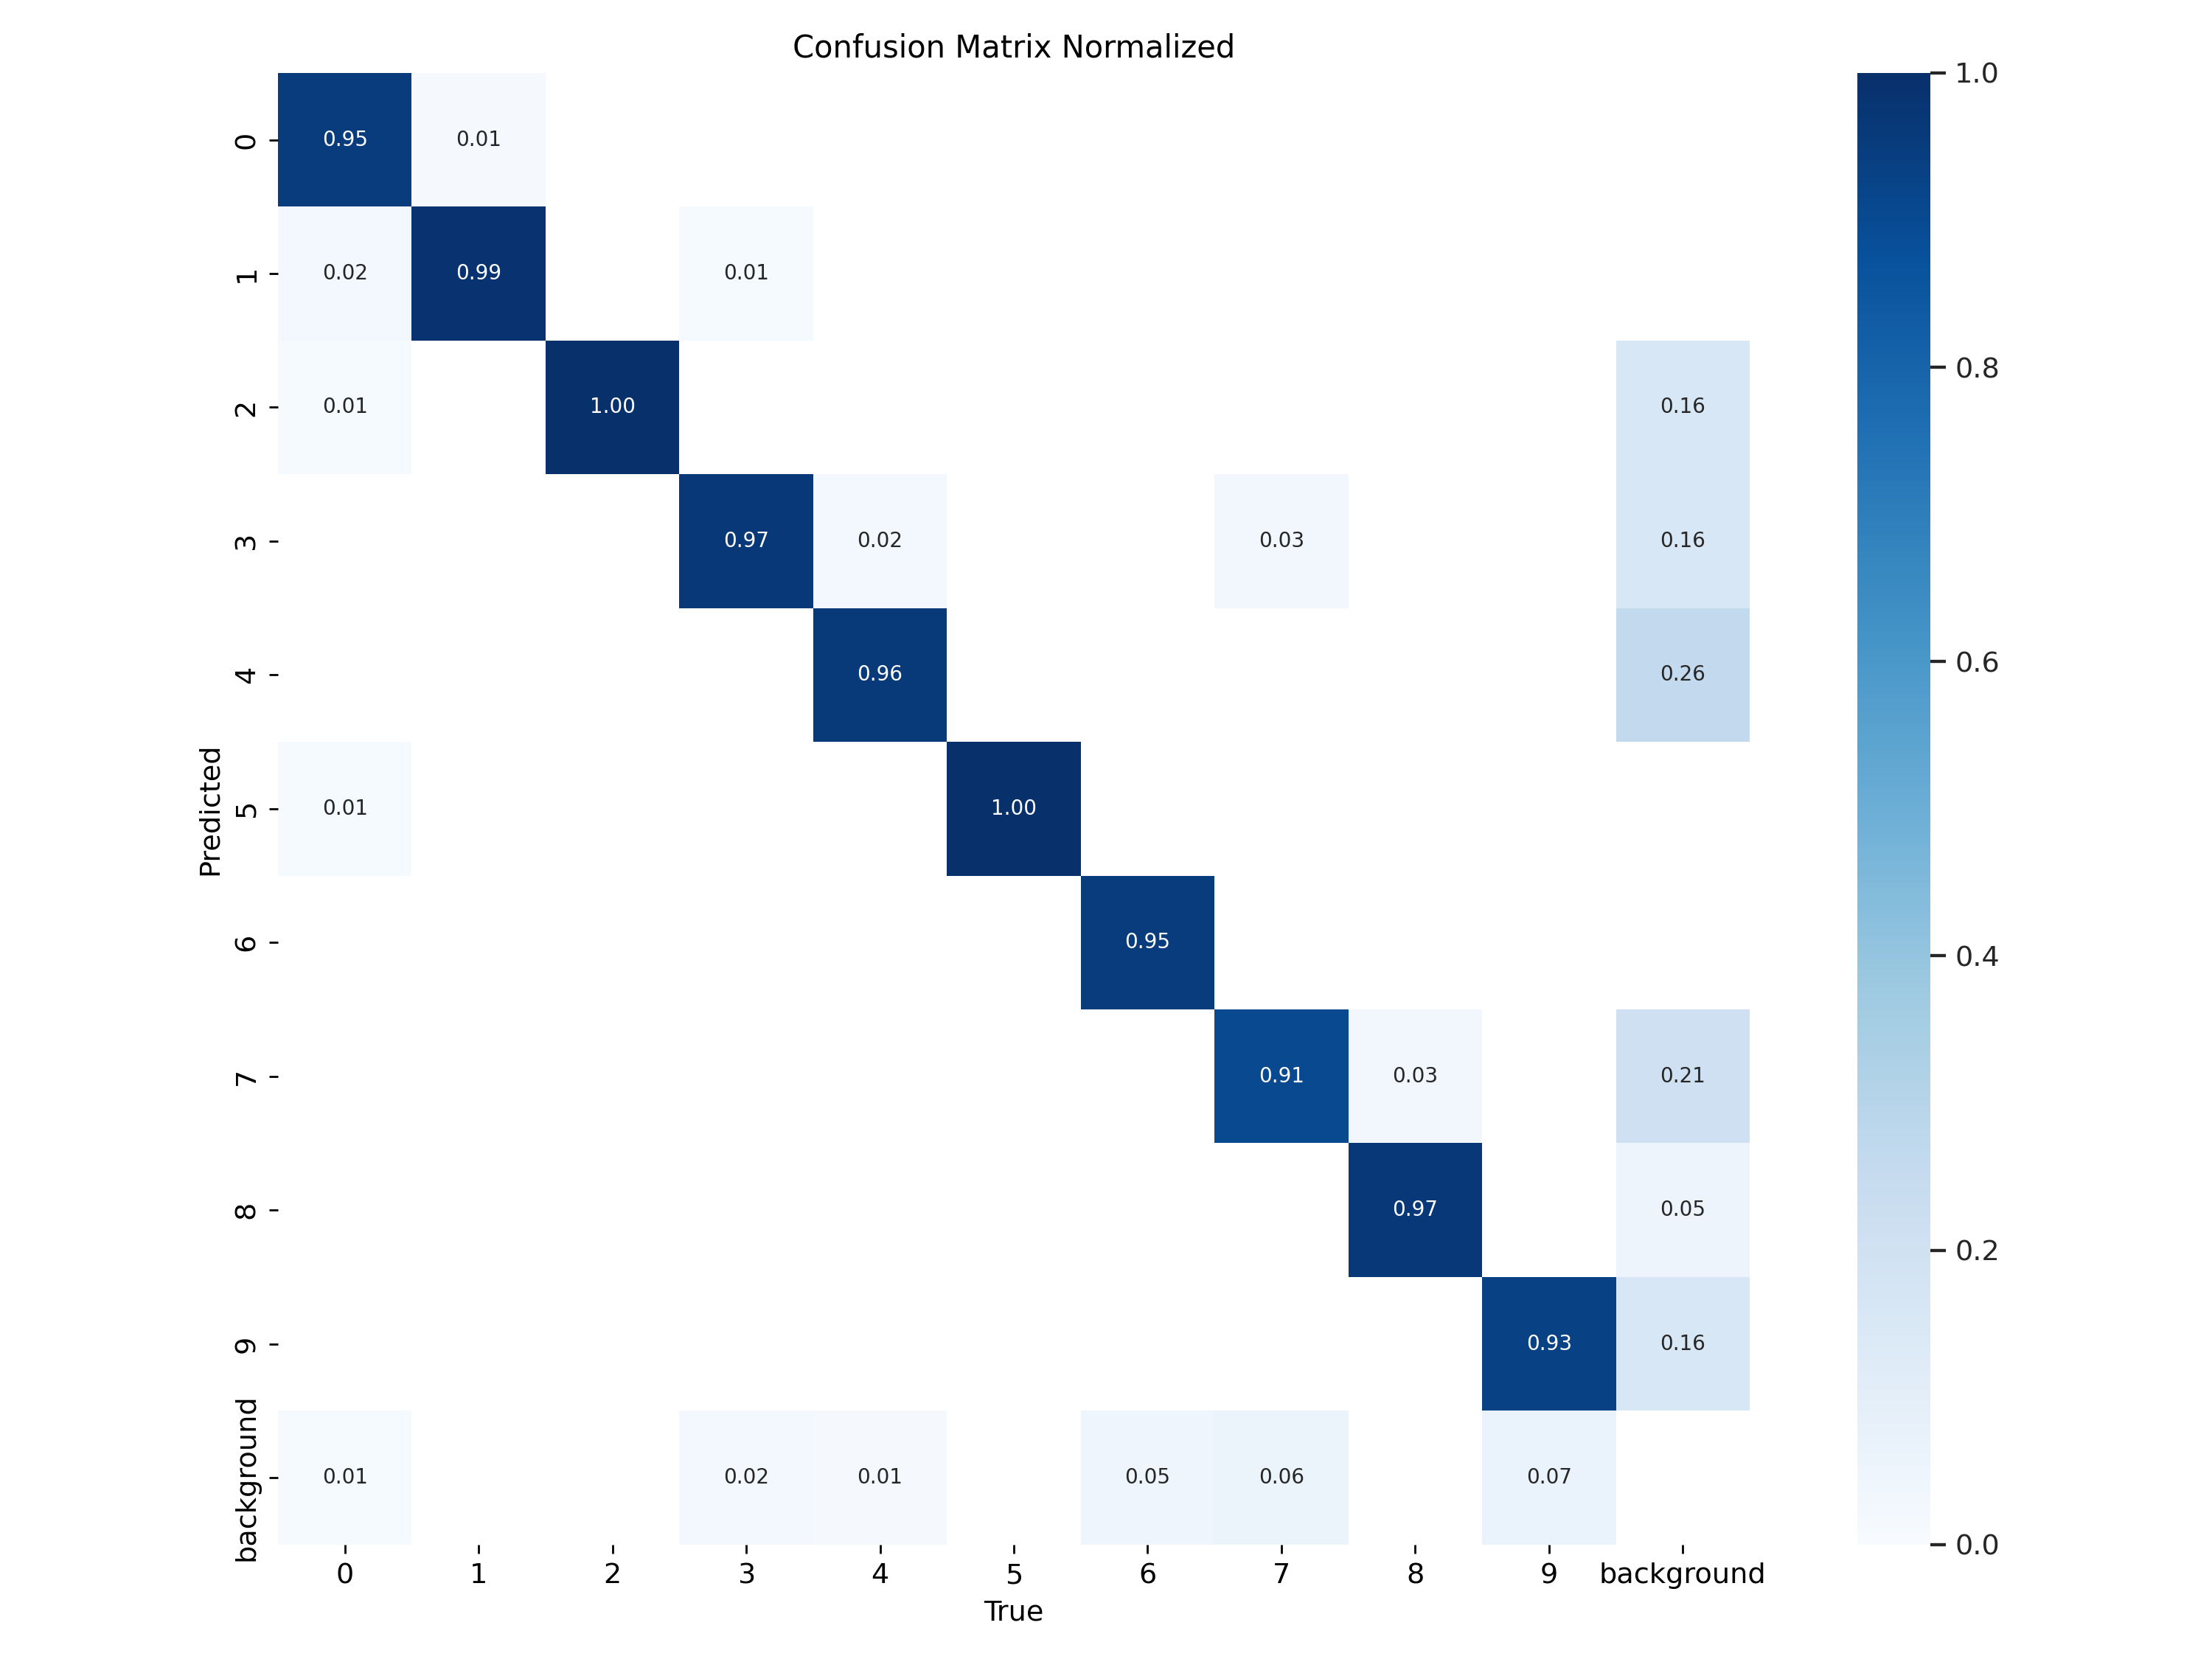

In [16]:
#training results
from IPython.display import Image

Image(filename = "/content/runs/detect/train2/confusion_matrix_normalized.png", width = 1000)

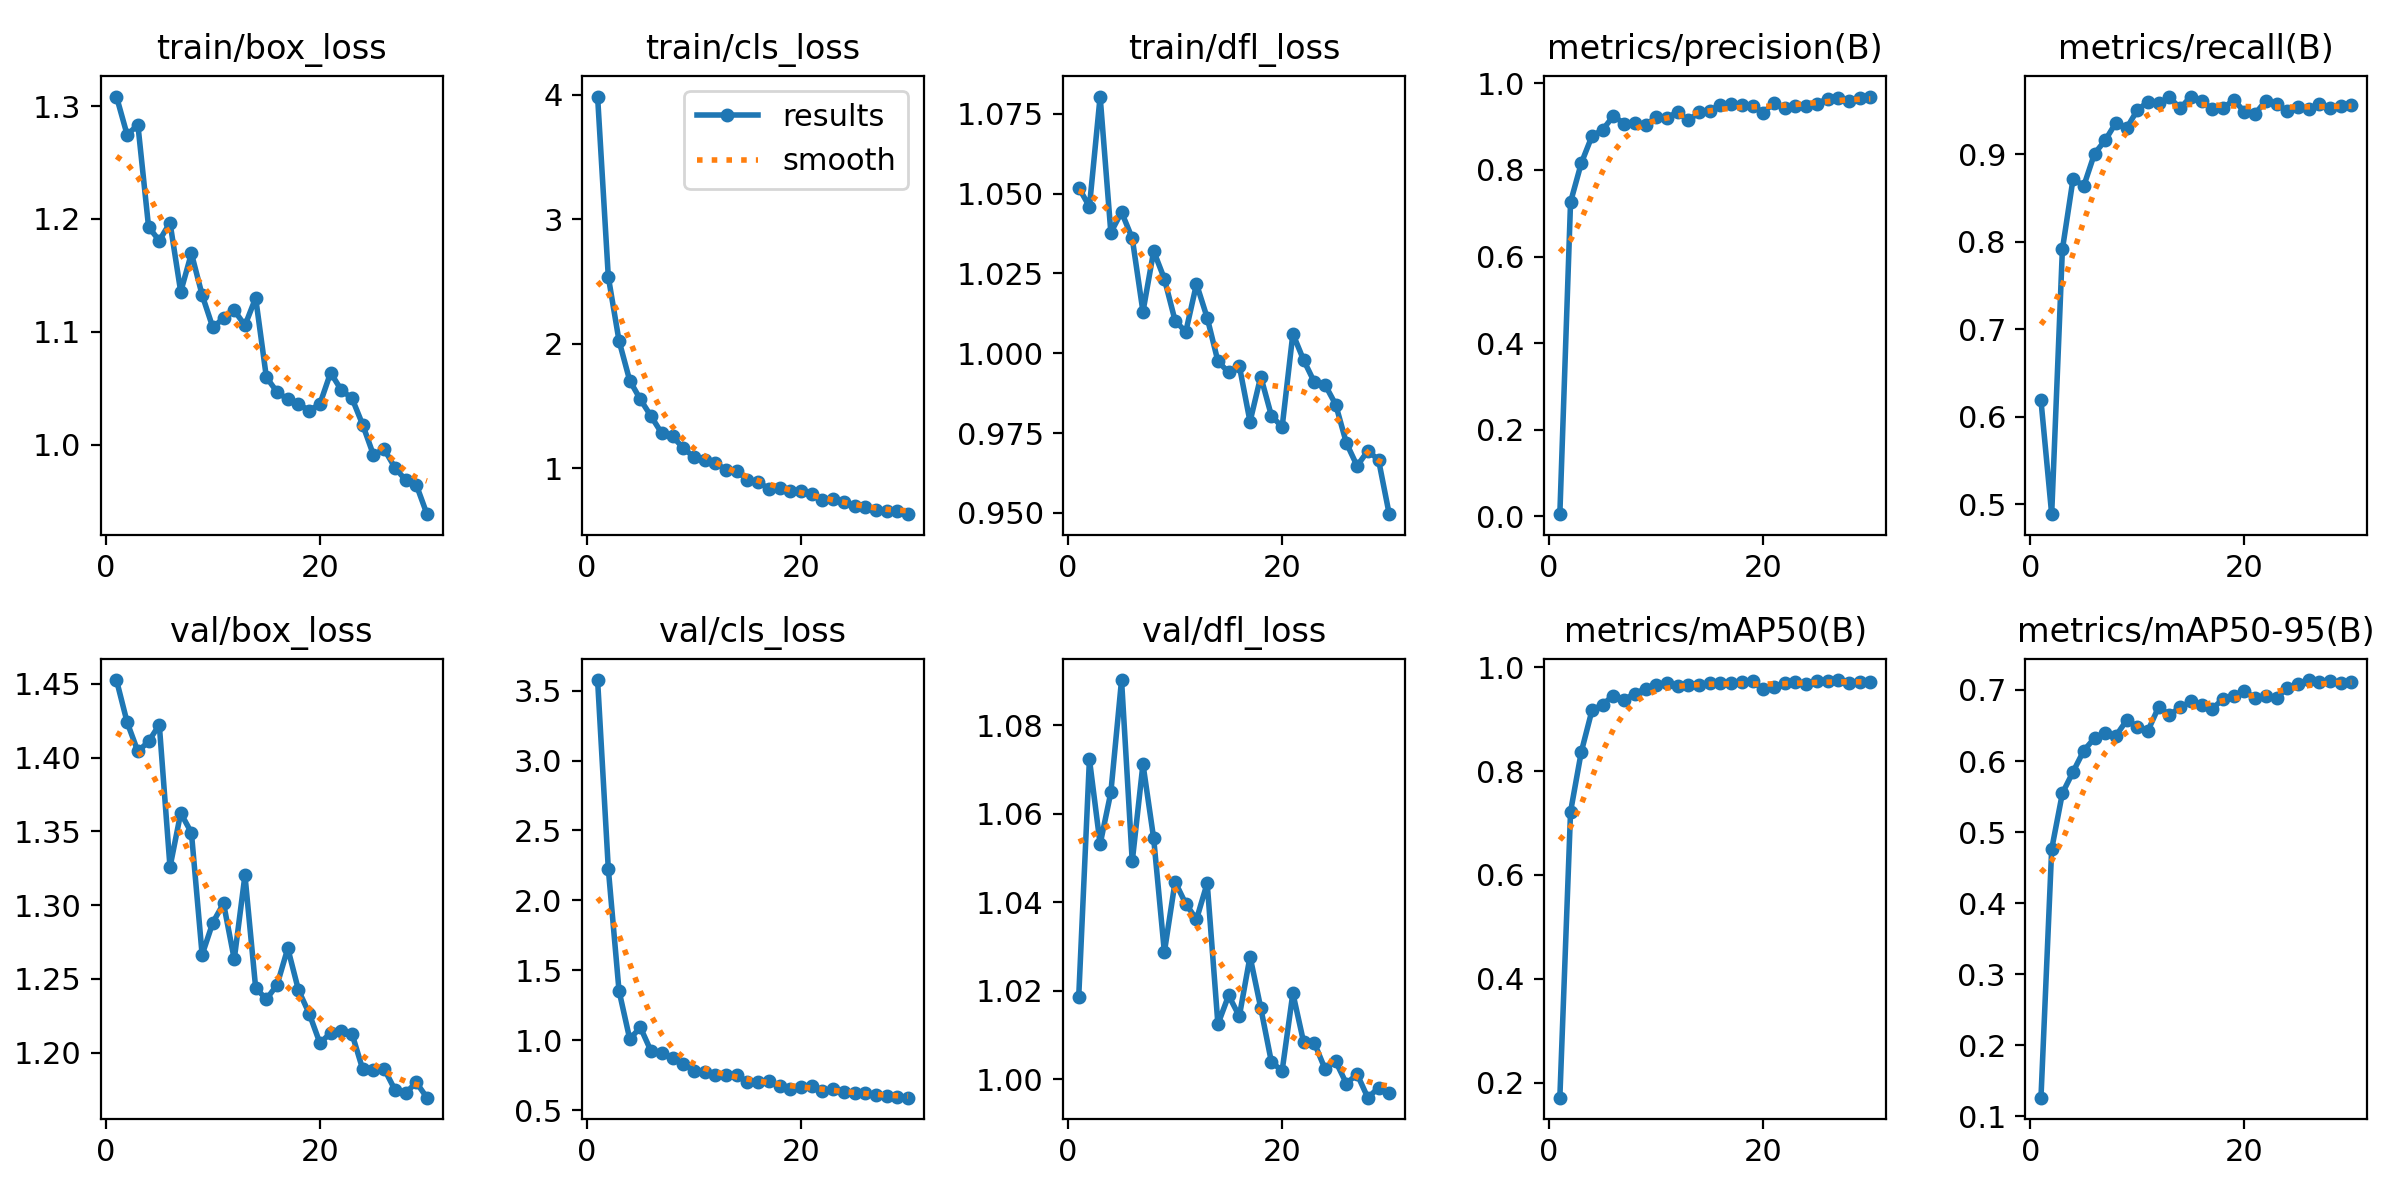

In [17]:
Image(filename = f"/content/runs/detect/train2/results.png", width = 1000)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Load a model
weight_path = "/content/drive/MyDrive/SOC_2024/best.pt"
model = YOLO("yolov8n.pt")
model = YOLO(weight_path)  # load a custom model

# Validate the model
metrics = model.val()

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/modelChoose-1/valid/labels.cache... 268 images, 0 backgrounds, 0 corrupt: 100%|██████████| 268/268 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]


                   all        268        598      0.964      0.952      0.974      0.712
                     0         99         99          1      0.942      0.984       0.68
                     1         85         85       0.94      0.965      0.944      0.632
                     2         82         82      0.972      0.976      0.989      0.689
                     3         87         88      0.954      0.947       0.95      0.626
                     4         79         80      0.981      0.963      0.987      0.658
                     5         35         35      0.971          1      0.994      0.742
                     6         21         21          1      0.965      0.995      0.789
                     7         31         32      0.875      0.876      0.943      0.722
                     8         29         30      0.966      0.948      0.978      0.871
                     9         46         46       0.98      0.935      0.975      0.715
Speed: 0.3ms preproce

In [20]:
# Run inference on test images with arguments
model.predict("/content/modelChoose-1/test/images", save=True, imgsz=320, conf=0.5)


image 1/134 /content/modelChoose-1/test/images/49007068062_31d87e4476_b_jpeg_jpg.rf.310bf517a1e6e3e47ef798dea87b16e7.jpg: 320x320 1 4, 10.4ms
image 2/134 /content/modelChoose-1/test/images/5750d567b0f07_jpeg_jpg.rf.fef3a036afb8a335b7ab8443f241b163.jpg: 320x320 (no detections), 10.5ms
image 3/134 /content/modelChoose-1/test/images/880cd603-c4b1-477e-872f-f238105abf59_jpeg_jpg.rf.3dc80db74cb02c077321b5c18ee21140.jpg: 320x320 1 1, 1 4, 1 9, 10.6ms
image 4/134 /content/modelChoose-1/test/images/BLOG-1_jpeg_jpg.rf.725d7dd459c78aaa10ef8f02d93adf81.jpg: 320x320 1 0, 1 1, 11.2ms
image 5/134 /content/modelChoose-1/test/images/BatteryLight-58ebec213df78c5162b9d68a_png_jpg.rf.ea3fe4a566973d6d1b108759803bc95b.jpg: 320x320 1 0, 6.9ms
image 6/134 /content/modelChoose-1/test/images/Brown_1_rot_0px_png_jpg.rf.cb845c67ce43496fbd42ed12ccb78e34.jpg: 320x320 1 1, 1 2, 1 3, 1 4, 1 6, 1 7, 1 8, 6.6ms
image 7/134 /content/modelChoose-1/test/images/Brown_6_rot_0px_png_jpg.rf.5d43dba39609e321e7ea767860ea6897.

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 obb: None
 orig_img: array([[[103, 103, 103],
         [103, 103, 103],
         [103, 103, 103],
         ...,
         [103, 103, 103],
         [103, 103, 103],
         [103, 103, 103]],
 
        [[103, 103, 103],
         [103, 103, 103],
         [103, 103, 103],
         ...,
         [103, 103, 103],
         [103, 103, 103],
         [103, 103, 103]],
 
        [[103, 103, 103],
         [103, 103, 103],
         [103, 103, 103],
         ...,
         [103, 103, 103],
         [103, 103, 103],
         [103, 103, 103]],
 
        ...,
 
        [[103, 103, 103],
         [103, 103, 103],
         [103, 103, 103],
         ...,
         [103, 103, 103],
         [103, 103, 103],
         [103, 103, 103]],
 
        [[103, 103, 103],
         [103, 10

In [24]:
import os
from IPython.display import Image, display

directory = "/content/runs/detect/predict"
for img_path in os.listdir(directory):
  full_path = os.path.join(directory, img_path)
  display(Image(filename = full_path, width = 320))
